In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import pandas as pd
from novfn import *
from tempo import *
from beat import *

# Part 1: Superflux Audio Novelty Functions

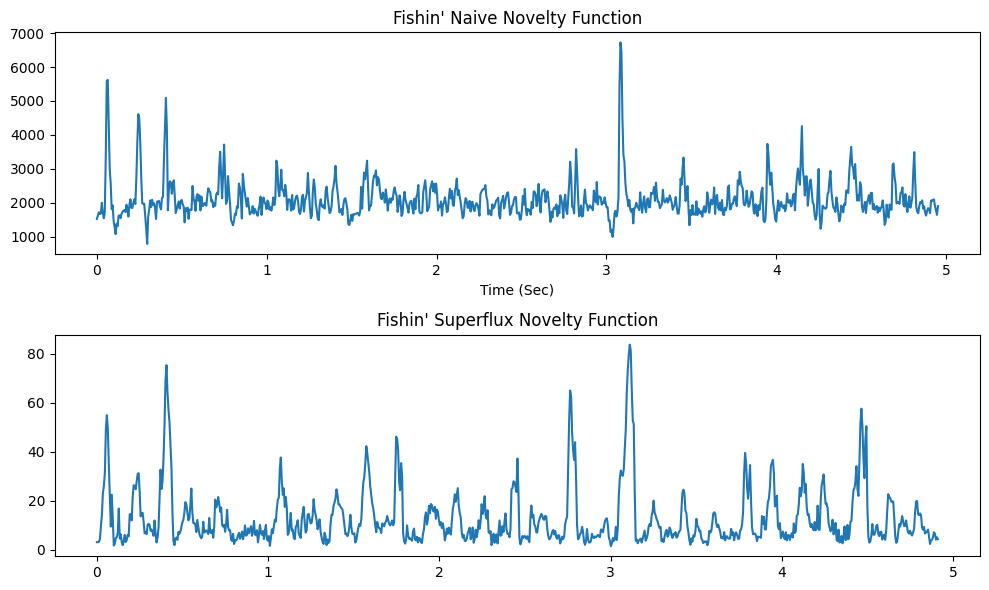

In [2]:
sr, x = wavfile.read("fishin.wav")
x = x/32768.0
hop_length = 256
win_length = 2048
mu = 8
y1 = get_novfn(x, sr, hop_length, win_length)
y2 = get_superflux_novfn(x, sr, hop_length, win_length, mu=mu, Gamma=1, max_win=3)
  
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(np.arange(len(y1))*hop_length/sr, y1)
plt.title("Fishin' Naive Novelty Function")
plt.xlabel("Time (Sec)")
  
plt.subplot(212)
plt.plot(np.arange(len(y2))*hop_length/sr, y2)
plt.title("Fishin' Superflux Novelty Function")
plt.tight_layout()

In [3]:
s1 = sonify_novfn(y1, hop_length)
ipd.Audio(s1, rate=sr)

In [4]:
s2 = sonify_novfn(y2, hop_length)
ipd.Audio(s2, rate=sr)

# Part 2: Tempo Estimation

## Fourier-Based Tempo Estimation

/var/folders/w9/gq97324j7bs80p9fwh67wvdr0000gn/T/ipykernel_3262/1470880315.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read("Testing/Audio/train4.wav")


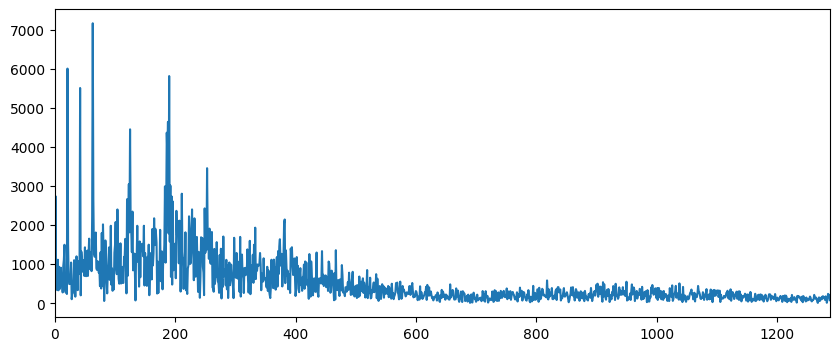

126.29248690845617
126.29248690845617


In [41]:
sr, x = wavfile.read("Testing/Audio/train4.wav")
hop_length = 512
win_length = 2048
max_win = 3
mu = 4
Gamma = 1
novfn = get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
novfn = novfn - np.mean(novfn) # Mean-center
print(get_fourier_tempo(novfn, hop_length, sr))

/Users/hwilt/COLLEGE/2023_Junior_Year/Spring2023/CS372/CS372/Assignments/HW4_Rhythm/tempo.py:147: WavFileWarning: Chunk (non-data) not understood, skipping it.
  f = os.path.join("Testing", "Audio", f.split(".txt")[0].split(os.path.sep)[-1] + ".wav")


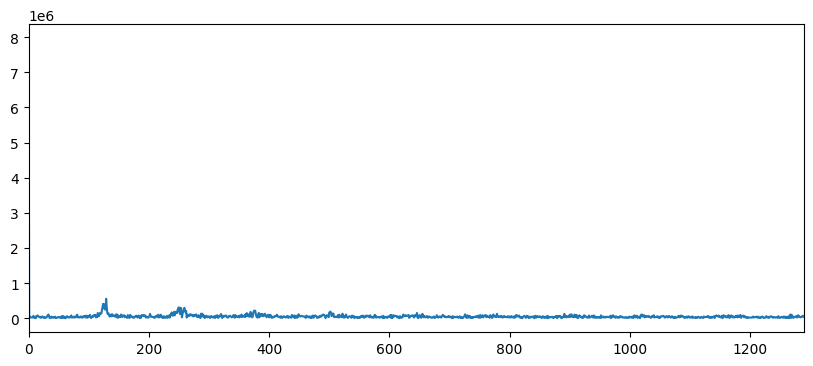

0.0


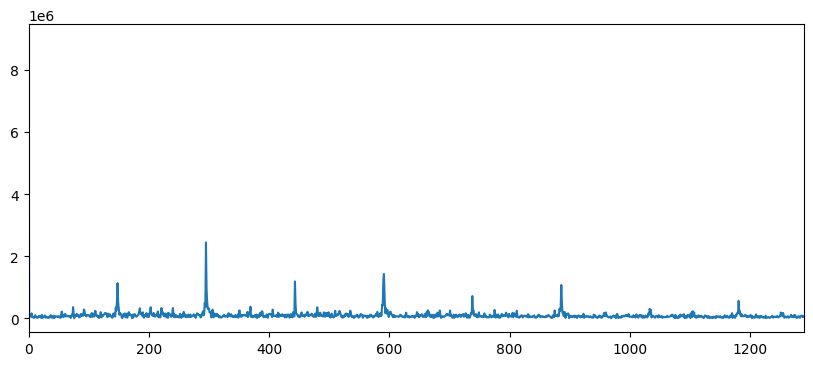

0.0


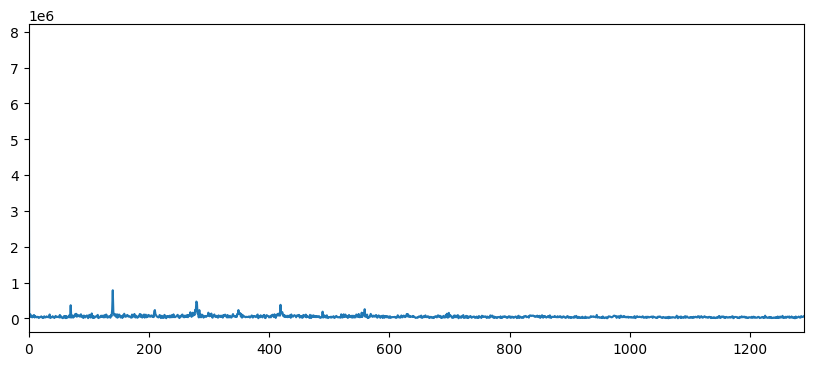

0.0


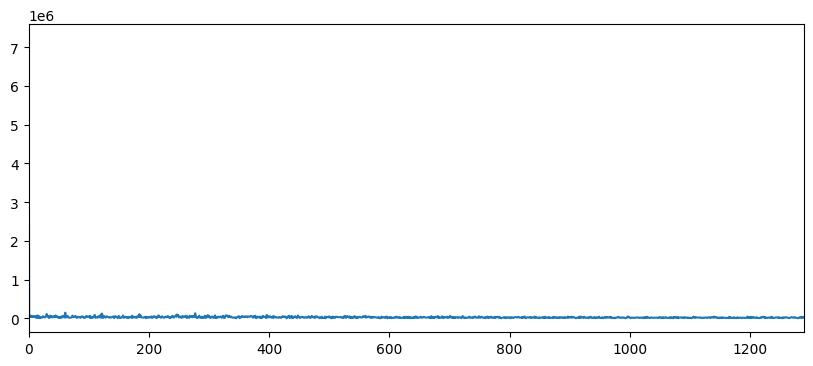

0.0


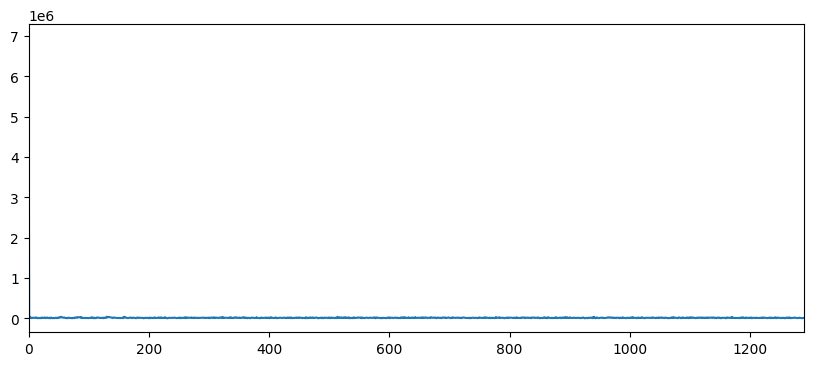

0.0


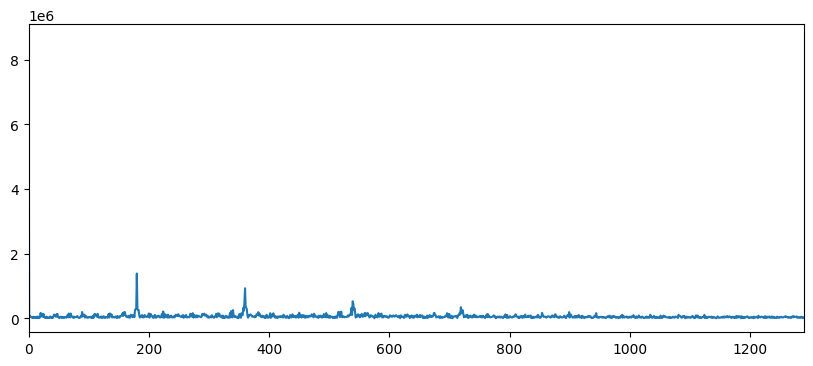

0.0


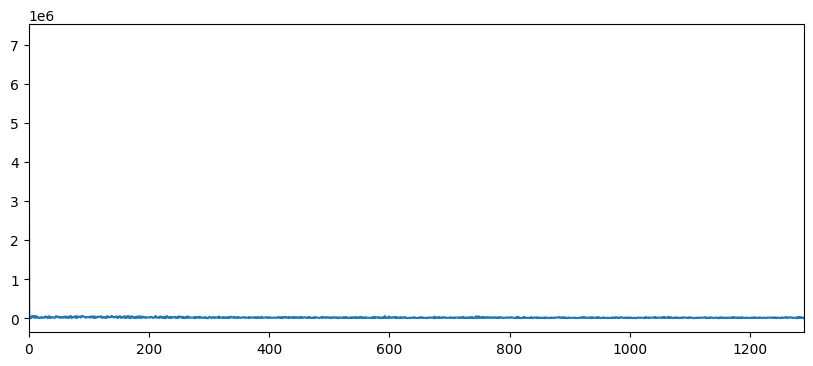

0.0


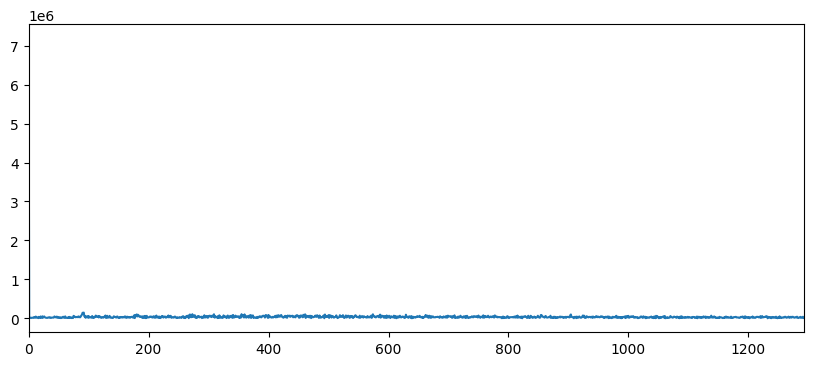

0.0


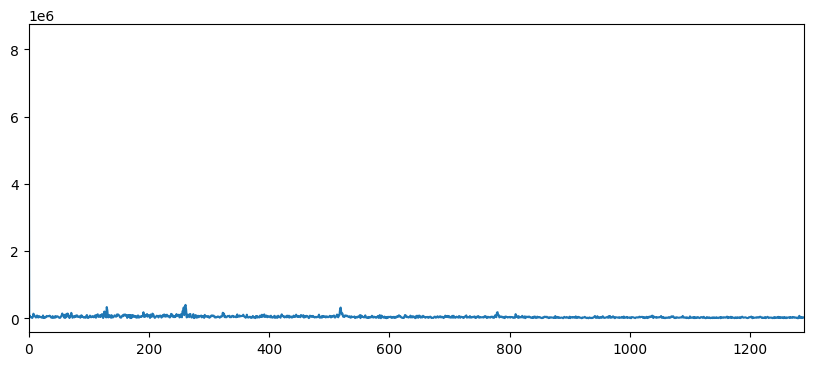

0.0


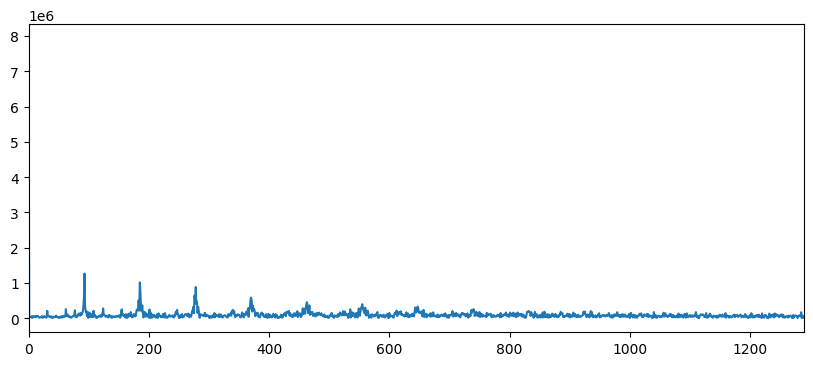

0.0


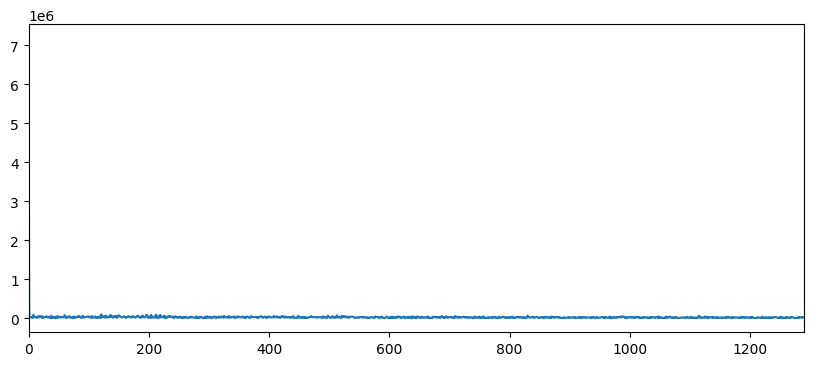

0.0


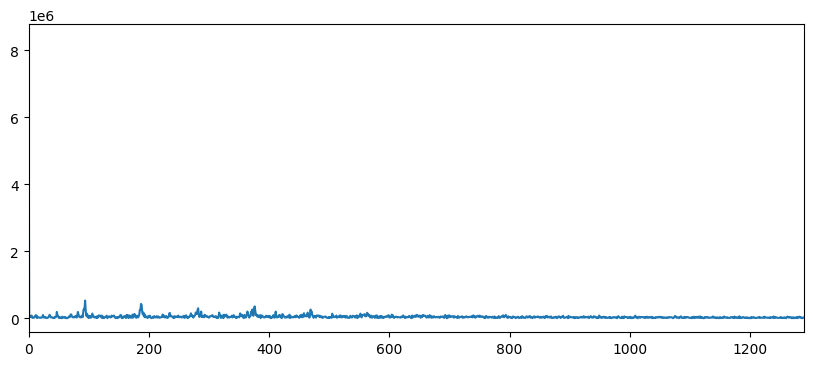

0.0


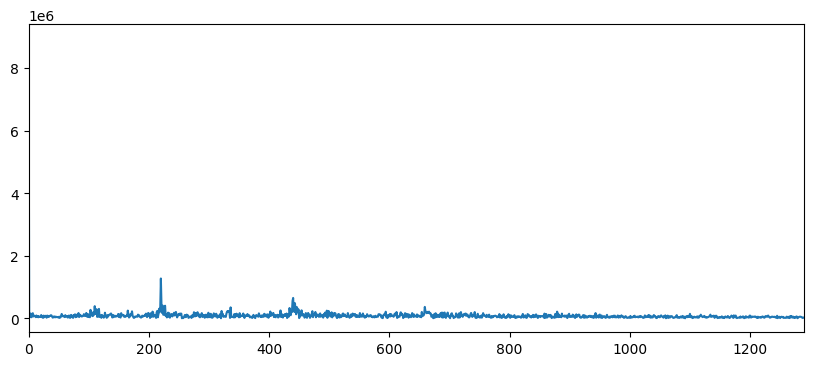

0.0


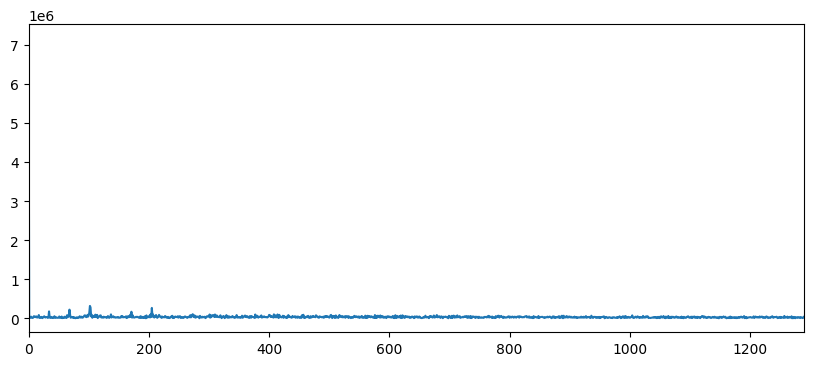

0.0


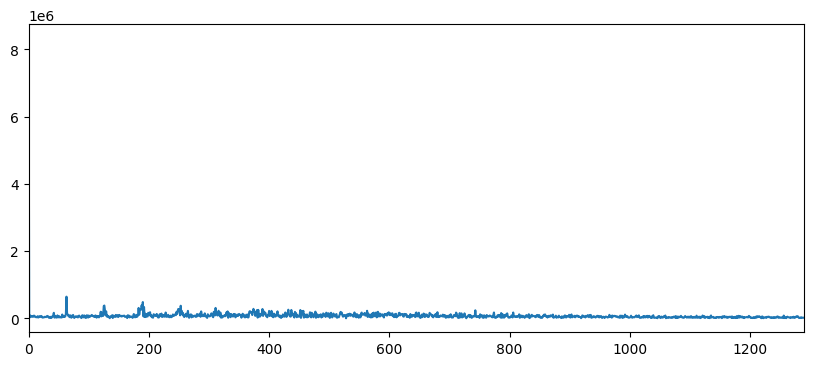

0.0


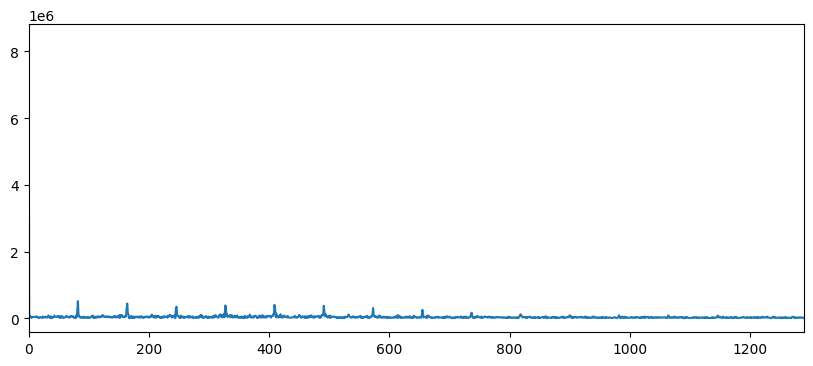

0.0


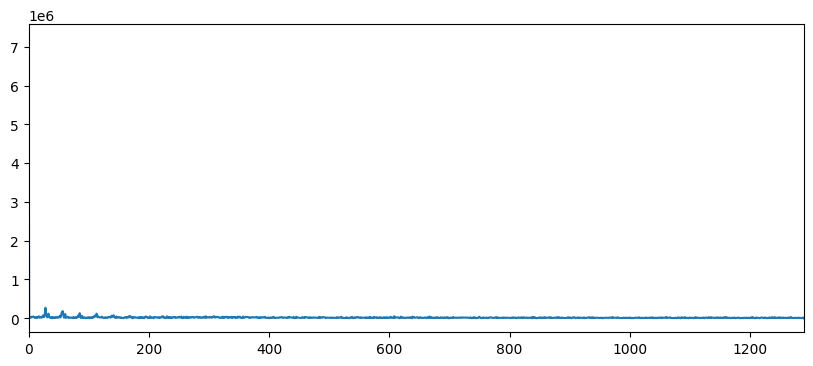

0.0


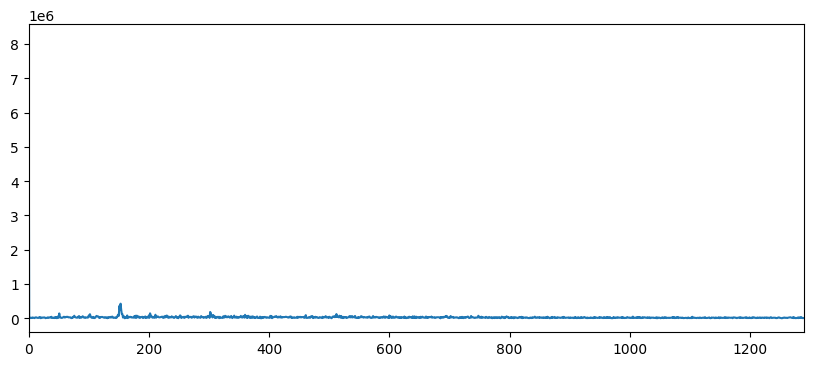

0.0


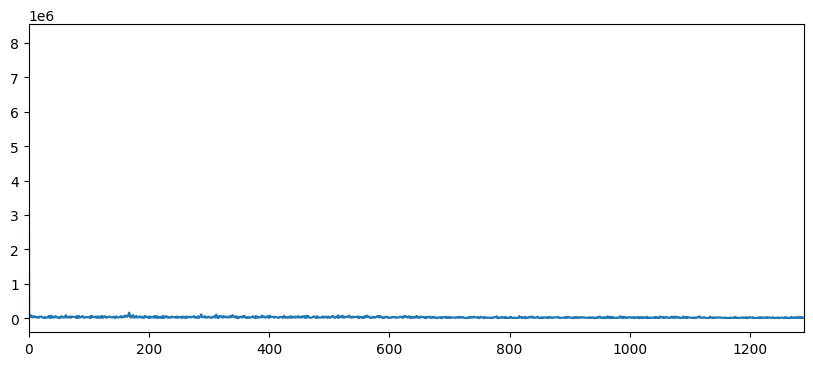

0.0


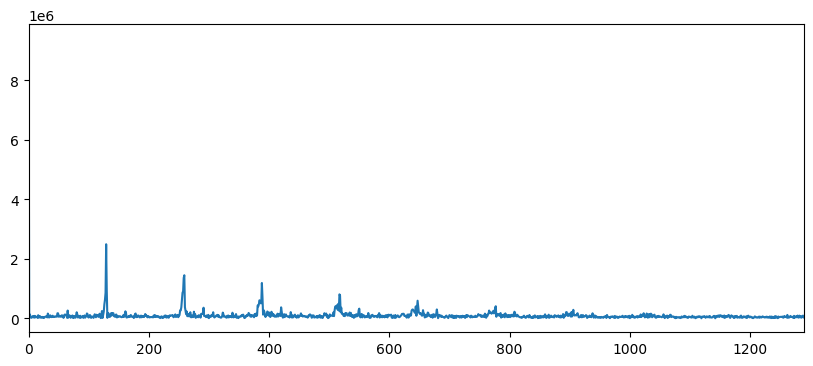

0.0
0 / 20


,names,Ground-Truth Tempos,Estimated Tempos,Close Enough
0,train1.wav,"[64.5, 129.5]",0.00,False
1,train2.wav,"[83.5, 167.5]",0.00,False
2,train3.wav,"[76.5, 153.0]",0.00,False
3,train4.wav,"[42.0, 126.0]",0.00,False
4,train5.wav,"[68.5, 205.5]",0.00,False
5,train6.wav,"[41.0, 82.0]",0.00,False
6,train7.wav,"[56.5, 113.5]",0.00,False
7,train8.wav,"[74.0, 148.0]",0.00,False
8,train9.wav,"[64.5, 129.0]",0.00,False
9,train10.wav,"[61.0, 122.5]",0.00,False


In [42]:
hop_length = 512
win_length = 2048
f_novfn = lambda x, hop_length, sr: get_novfn(x, sr, hop_length, win_length)
results = evaluate_tempos(f_novfn, get_fourier_tempo, hop_length)
ipd.HTML(results.to_html(escape=False, float_format='%.2f'))

/Users/hwilt/COLLEGE/2023_Junior_Year/Spring2023/CS372/CS372/Assignments/HW4_Rhythm/tempo.py:147: WavFileWarning: Chunk (non-data) not understood, skipping it.
  f = os.path.join("Testing", "Audio", f.split(".txt")[0].split(os.path.sep)[-1] + ".wav")


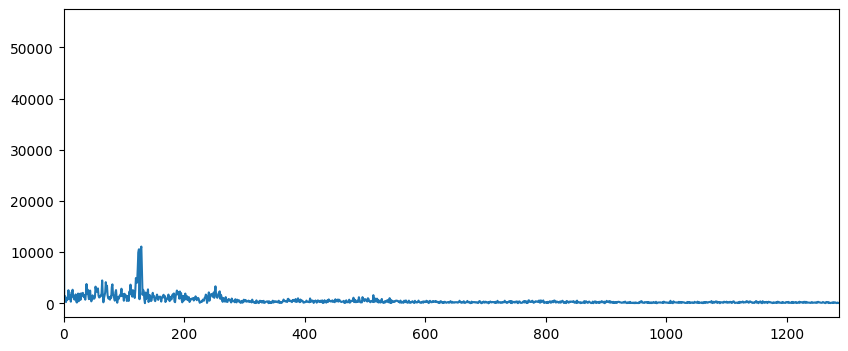

0.0


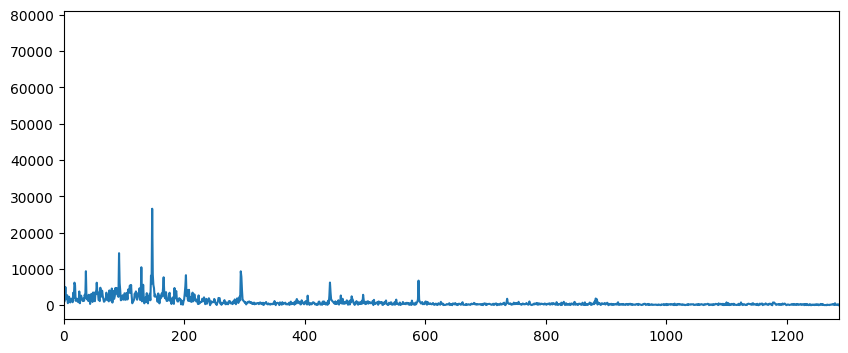

0.0


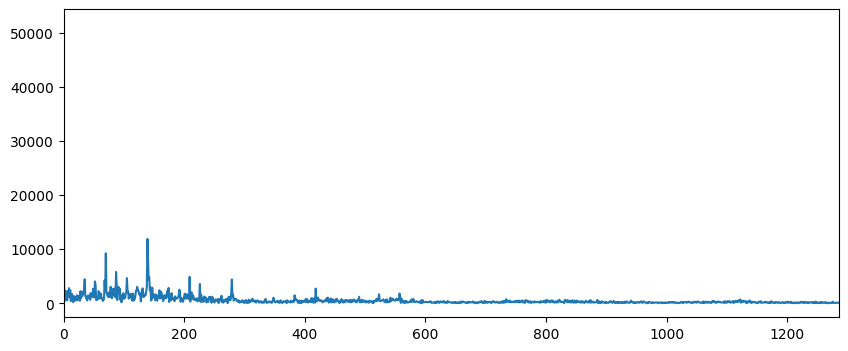

0.0


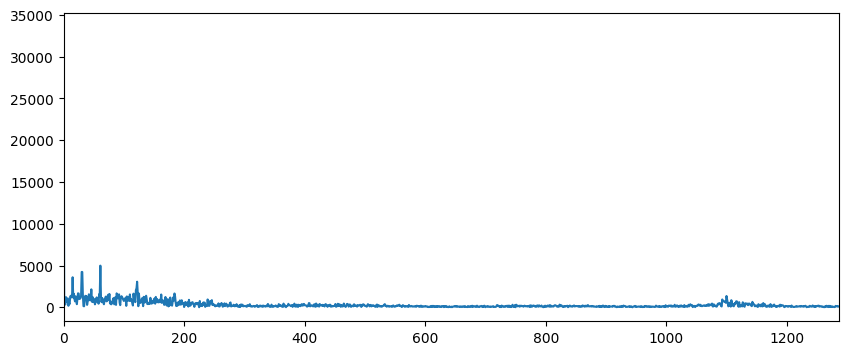

0.0


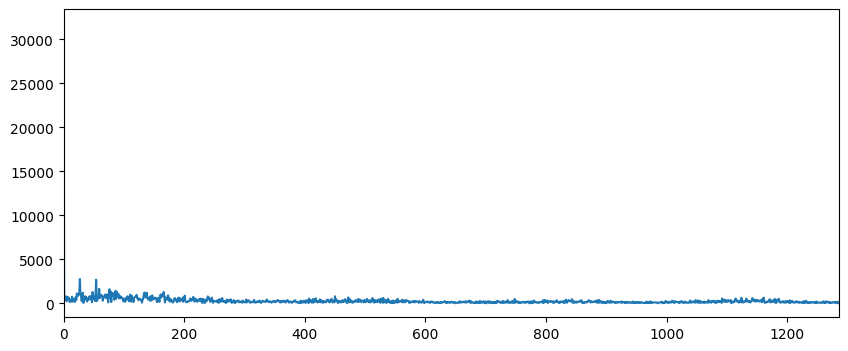

0.0


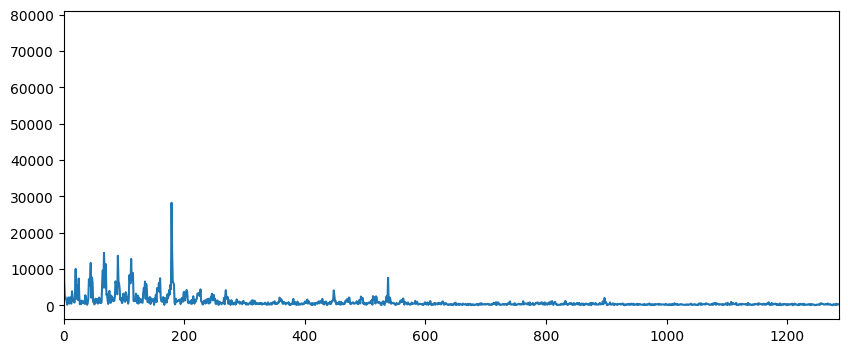

0.0


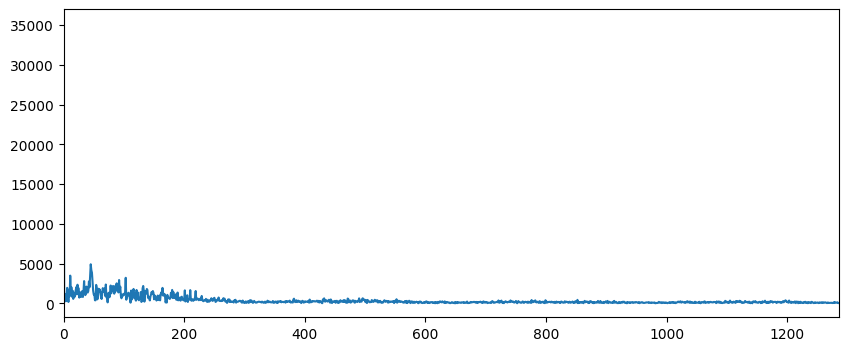

0.0


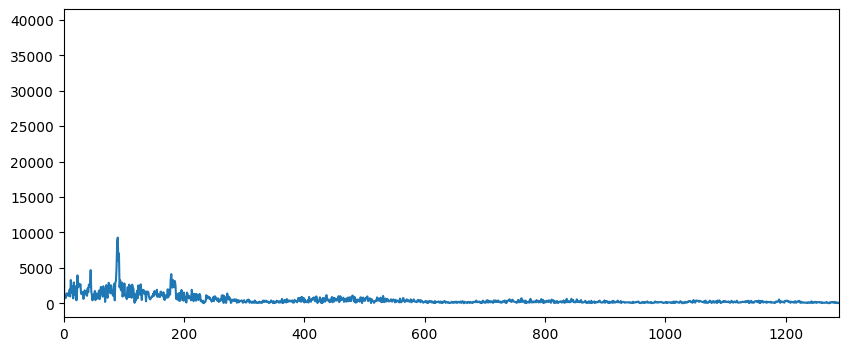

0.0


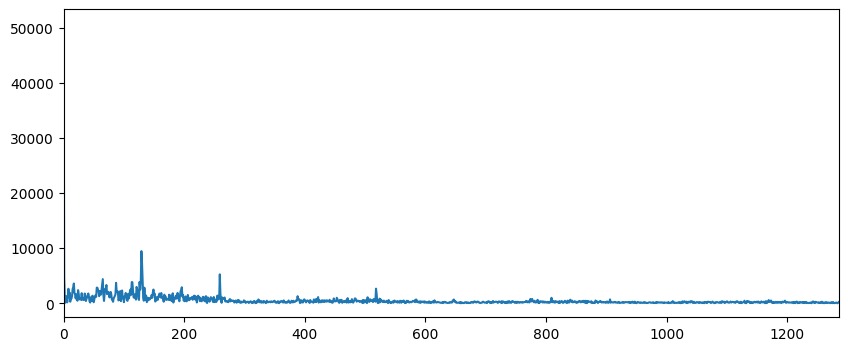

0.0


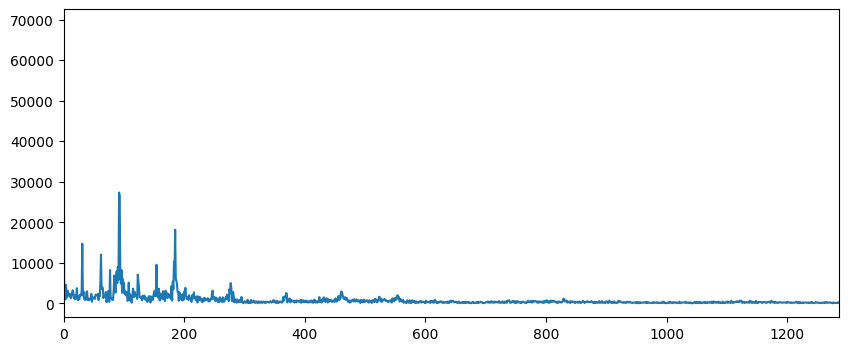

0.0


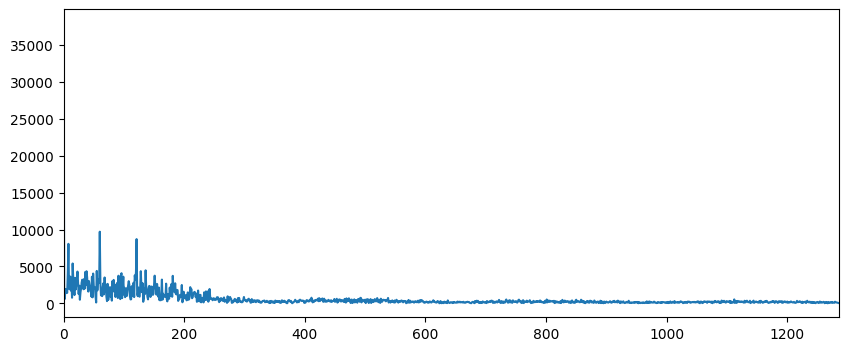

0.0


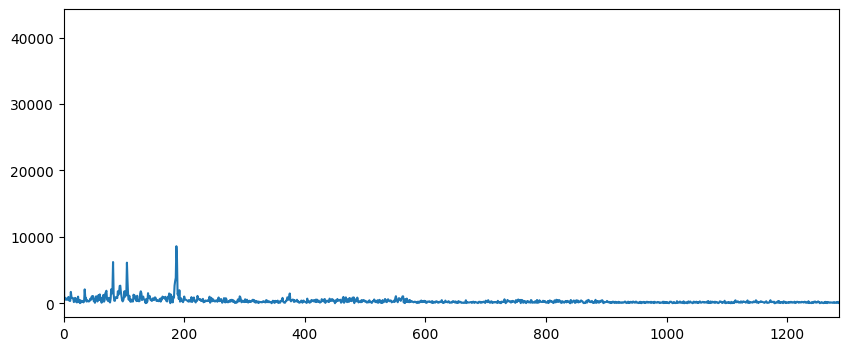

0.0


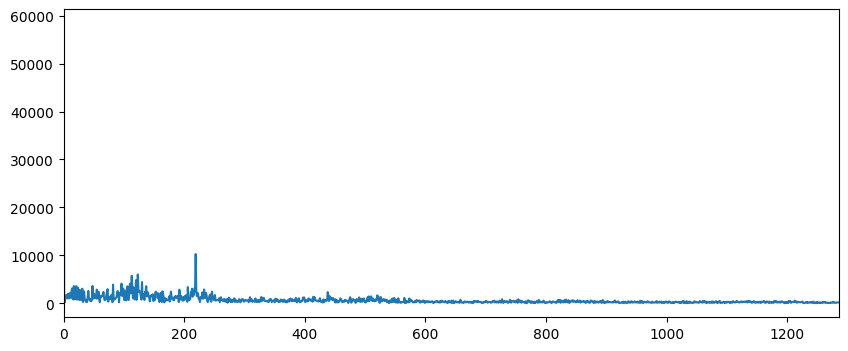

0.0


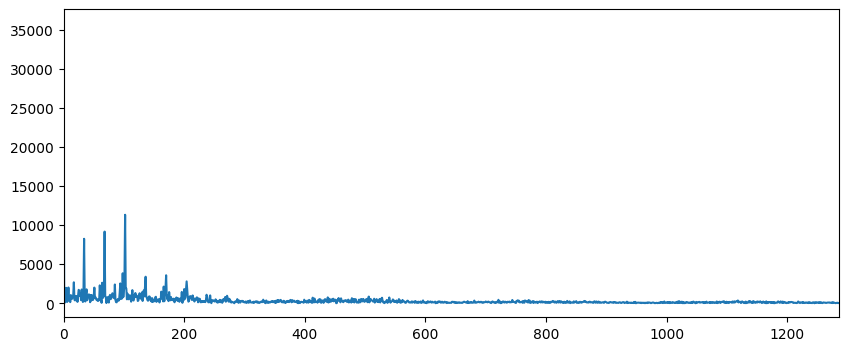

0.0


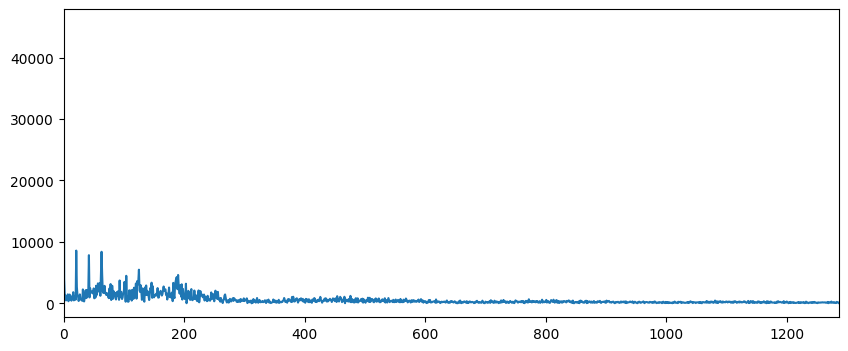

0.0


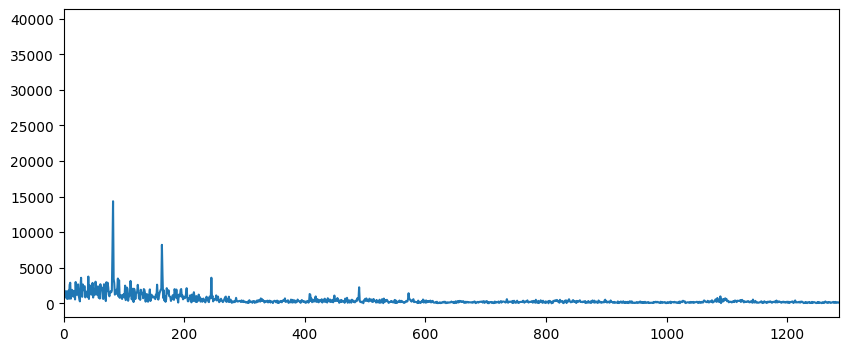

0.0


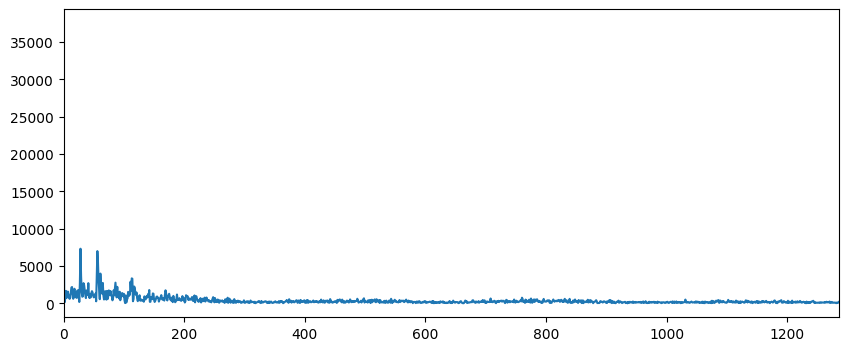

0.0


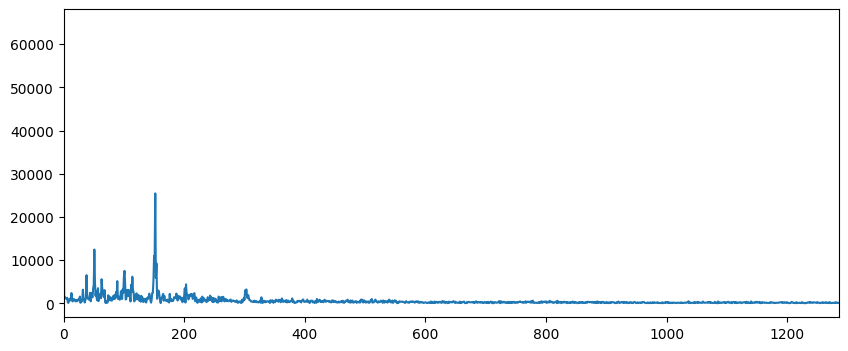

0.0


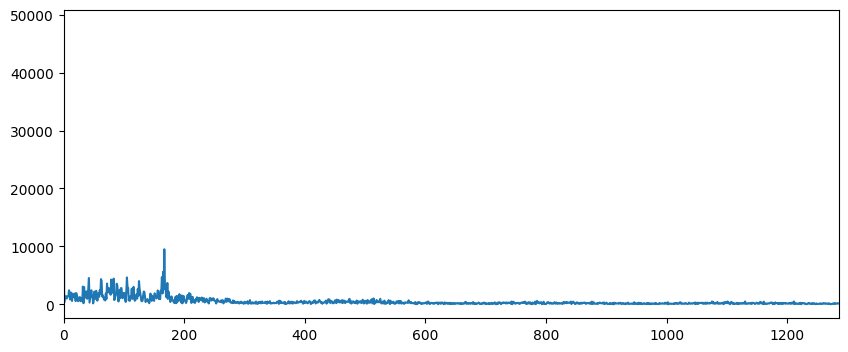

0.0


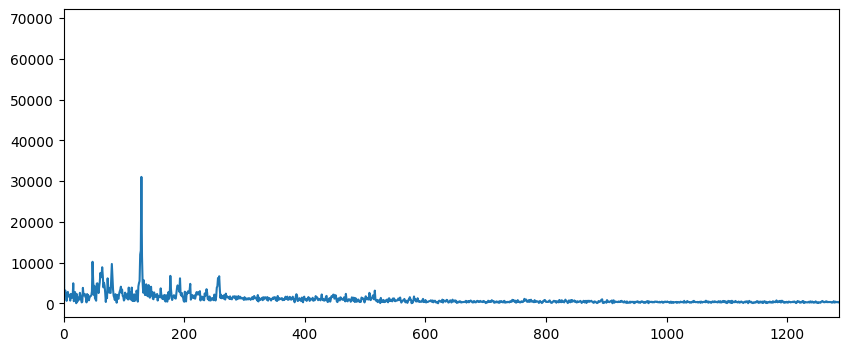

0.0
0 / 20


,names,Ground-Truth Tempos,Estimated Tempos,Close Enough
0,train1.wav,"[64.5, 129.5]",0.00,False
1,train2.wav,"[83.5, 167.5]",0.00,False
2,train3.wav,"[76.5, 153.0]",0.00,False
3,train4.wav,"[42.0, 126.0]",0.00,False
4,train5.wav,"[68.5, 205.5]",0.00,False
5,train6.wav,"[41.0, 82.0]",0.00,False
6,train7.wav,"[56.5, 113.5]",0.00,False
7,train8.wav,"[74.0, 148.0]",0.00,False
8,train9.wav,"[64.5, 129.0]",0.00,False
9,train10.wav,"[61.0, 122.5]",0.00,False


In [43]:
hop_length = 512
win_length = 2048
max_win = 6
mu = 8
Gamma = 1
f_novfn = lambda x, hop_length, sr: get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
results = evaluate_tempos(f_novfn, get_fourier_tempo, hop_length)
ipd.HTML(results.to_html(escape=False, float_format='%.2f'))

## DFT-ACF Tempo Estimation

In [8]:
hop_length = 512
win_length = 2048
max_win = 6
mu = 8
Gamma = 1
f_novfn = lambda x, hop_length, sr: get_superflux_novfn(x, sr, hop_length, win_length, max_win, mu, Gamma)
results = evaluate_tempos(f_novfn, get_acf_dft_tempo, hop_length)
ipd.HTML(results.to_html(escape=False, float_format='%.2f'))

/Users/hwilt/COLLEGE/2023_Junior_Year/Spring2023/CS372/CS372/Assignments/HW4_Rhythm/tempo.py:143: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, x = wavfile.read(f)


0 / 20


,names,Ground-Truth Tempos,Estimated Tempos,Close Enough
0,train1.wav,"[64.5, 129.5]",0,False
1,train2.wav,"[83.5, 167.5]",0,False
2,train3.wav,"[76.5, 153.0]",0,False
3,train4.wav,"[42.0, 126.0]",0,False
4,train5.wav,"[68.5, 205.5]",0,False
5,train6.wav,"[41.0, 82.0]",0,False
6,train7.wav,"[56.5, 113.5]",0,False
7,train8.wav,"[74.0, 148.0]",0,False
8,train9.wav,"[64.5, 129.0]",0,False
9,train10.wav,"[61.0, 122.5]",0,False
